In [1]:
# Connect to drive to get dataset

from google.colab import drive
drive.mount("/content/drive")

# Unzip data if loaded from drive
!unzip -q "/content/drive/My Drive/Coins Detector - Keras/br-coins-classification.zip" -d "/content/sample_data/br-coins-classification"

Mounted at /content/drive


In [2]:
# Imports
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
def fetch_data_from_coins_dataset():
  X = []
  Y = []

  path = "/content/sample_data/br-coins-classification/all"
  pics_names = os.listdir("/content/sample_data/br-coins-classification/all")\

  for i in range(len(pics_names)):
    pic_name_i = pics_names[i]
    pic_complete_path = os.path.join(path, pic_name_i)
    new_x = cv2.imread(pic_complete_path)
    X.append(new_x)
    new_y = str.split(pic_name_i, '_')
    if new_y[0]=='100':
      Y.append(4)
    if new_y[0]=='50':
      Y.append(3)
    if new_y[0]=='25':
      Y.append(2)
    if new_y[0]=='10':
      Y.append(1)
    if new_y[0]=='5':
      Y.append(0)
    
  return X, Y

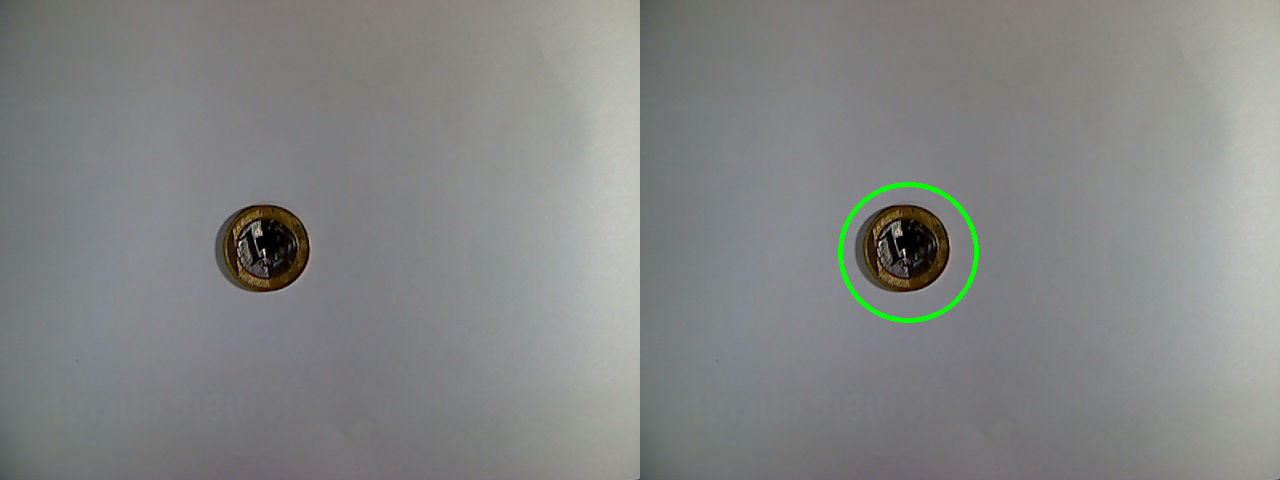

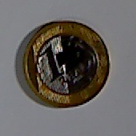

In [4]:
def create_cropped_imgs_folder():
  # !pwd
  %cd sample_data/
  !mkdir new-br-coins-classification
  %cd new-br-coins-classification
  !mkdir all
  # !pwd

def crop_image():
  # load the image, clone it for output, and then convert it to grayscale
  # image is the image file we want to find circle in it.
  image = cv2.imread("/content/sample_data/br-coins-classification/all/100_1477154436.jpg")
  output = image.copy()
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # detect circles in the image
  circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 8, 700)
  # ensure at least some circles were found
  if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    # print(circles)      # circles = (x, y, radius) from top-left
    circles[0, 2] += 35   # make the circle a bit larger to contain the whole coin
    # print(circles)

    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
      # draw the circle in the output image, then draw a rectangle
      # corresponding to the center of the circle
      cv2.circle(output, (x, y), r, (0, 255, 0), 4)

    cv2_imshow(np.hstack([image, output]))
    # cv2_imshow(image)

    # crop the circle in the image
    print("\n\n")
    y_line_1 = circles[0, 0] - circles[0, 2]
    if y_line_1 < 0:
      y_line_1 = 0
    y_line_2 = circles[0, 0] + circles[0, 2]
    x_line_1 = circles[0, 1] - circles[0, 2]
    if x_line_1 < 0:
      x_line_1 = 0
    x_line_2 = circles[0, 1] + circles[0, 2]
    # print(y_line_1)
    # print(y_line_2)
    # print(x_line_1)
    # print(x_line_2)
    cropped = image[x_line_1:x_line_2, y_line_1:y_line_2,]

    # save img --> changes the color??
    # cropped_save = array_to_img(cropped, scale=False) #scale=False
    # cropped_save.save('/content/sample_data/new-br-coins-classification/all/100_1477154538.jpg')
    # save_img('/content/sample_data/new-br-coins-classification/all/100_1477154538.png', cropped)
    cv2_imshow(cropped)

    # print(cropped.shape)

    # return cropped

# create_cropped_imgs_folder()
crop_image()
# cv2_imshow(crop_image())